In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = 'https://raw.githubusercontent.com/nadrowskyy/otomoto-scrap-analize/main/all_cars.csv'

In [3]:
df = pd.read_csv(file, low_memory=False, parse_dates=['Pierwsza rejestracja', 'Data dodania'])

In [4]:
df['Cena'] = pd.to_numeric(df['Cena'], errors='coerce')

In [5]:
df['ID'] = df['ID'].convert_dtypes()

In [6]:
df.drop_duplicates(subset=['ID'], keep=False)
df.dropna(subset=['ID'], inplace=True)

In [7]:
df.dropna(subset=['Cena'], inplace=True)

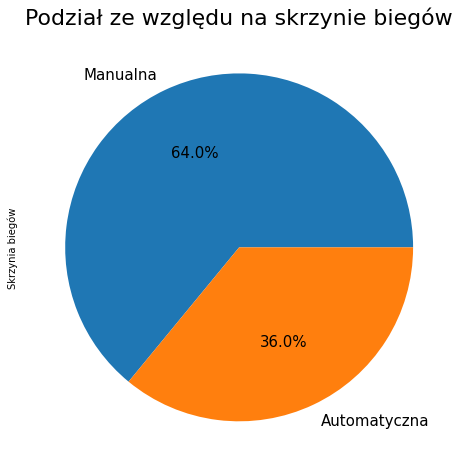

In [8]:
skrzynia = df["Skrzynia biegów"].value_counts(normalize=True) * 100
plot_1 = skrzynia.plot(kind='pie', figsize=(12,8),autopct='%1.1f%%', fontsize=15, title='Podział ze względu na skrzynie biegów')
plot_1.title.set_size(22)

In [9]:
najw_km = df[['Marka', 'Model', 'Moc', 'Cena', 'Waluta']].nlargest(10, 'Moc')
najw_km

,Marka,Model,Moc,Cena,Waluta
46904,dodge,charger,885.0,310000.0,PLN
46971,dodge,charger,850.0,259000.0,PLN
47522,ferrari,488,800.0,1569000.0,PLN
47552,ferrari,488,800.0,738000.0,EUR
47562,ferrari,488,800.0,1299000.0,PLN
47585,ferrari,812-superfast,800.0,1569000.0,PLN
47586,ferrari,812-superfast,800.0,738000.0,EUR
47587,ferrari,812-superfast,800.0,1299000.0,PLN
106212,mercedes-benz,g-klasa,800.0,510000.0,EUR
187205,toyota,supra,799.0,550000.0,PLN


In [10]:
najdrozsze = df[['Marka', 'Model', 'Cena', 'Waluta', 'Stan']].nlargest(10, 'Cena')
najdrozsze

,Marka,Model,Cena,Waluta,Stan
108232,mercedes-benz,slr,3490000.0,PLN,Używane
147316,porsche,911,2583000.0,PLN,Używane
159396,rolls-royce,ghost,2370000.0,PLN,Nowe
159394,rolls-royce,cullinan,2330000.0,PLN,Nowe
89842,lamborghini,aventador,2300000.0,PLN,Używane
159416,rolls-royce,wraith,2101970.0,PLN,Nowe
159393,rolls-royce,cullinan,2100000.0,PLN,Używane
159419,rolls-royce,wraith,2013000.0,PLN,Nowe
159417,rolls-royce,wraith,1950000.0,PLN,Nowe
97320,mclaren,720s-spider,1862200.0,PLN,Nowe


In [11]:
zabytkowe = df[df['Czy zabytek'].apply(lambda x: x == True)] 
najdr_zabytki = zabytkowe[['Marka', 'Model', 'Rok prod.', 'Cena', 'Waluta', 'Czy zabytek']].nlargest(10, 'Cena')
najdr_zabytki

,Marka,Model,Rok prod.,Cena,Waluta,Czy zabytek
80254,jaguar,xk,1956.0,890000.0,PLN,True
79406,jaguar,e-type,1965.0,725000.0,PLN,True
47544,ferrari,488,1986.0,685000.0,PLN,True
47615,ferrari,testarossa,1986.0,685000.0,PLN,True
147275,porsche,911,1976.0,650000.0,PLN,True
66127,ford,mustang,1967.0,499000.0,PLN,True
66534,ford,mustang,1968.0,498000.0,PLN,True
66265,ford,mustang,1967.0,480000.0,PLN,True
147354,porsche,911,1968.0,455000.0,PLN,True
47500,ferrari,308,1978.0,390000.0,PLN,True


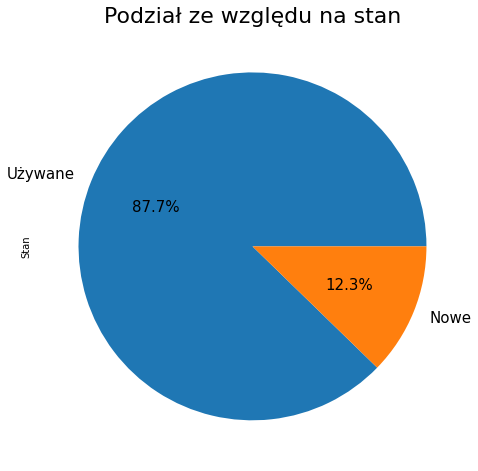

In [12]:
stan2 = df["Stan"].value_counts(normalize=True) * 100
plot_2 = stan2.plot(kind='pie',autopct='%1.1f%%', figsize=(12,8), fontsize=15, title='Podział ze względu na stan')
plot_2.title.set_size(22)

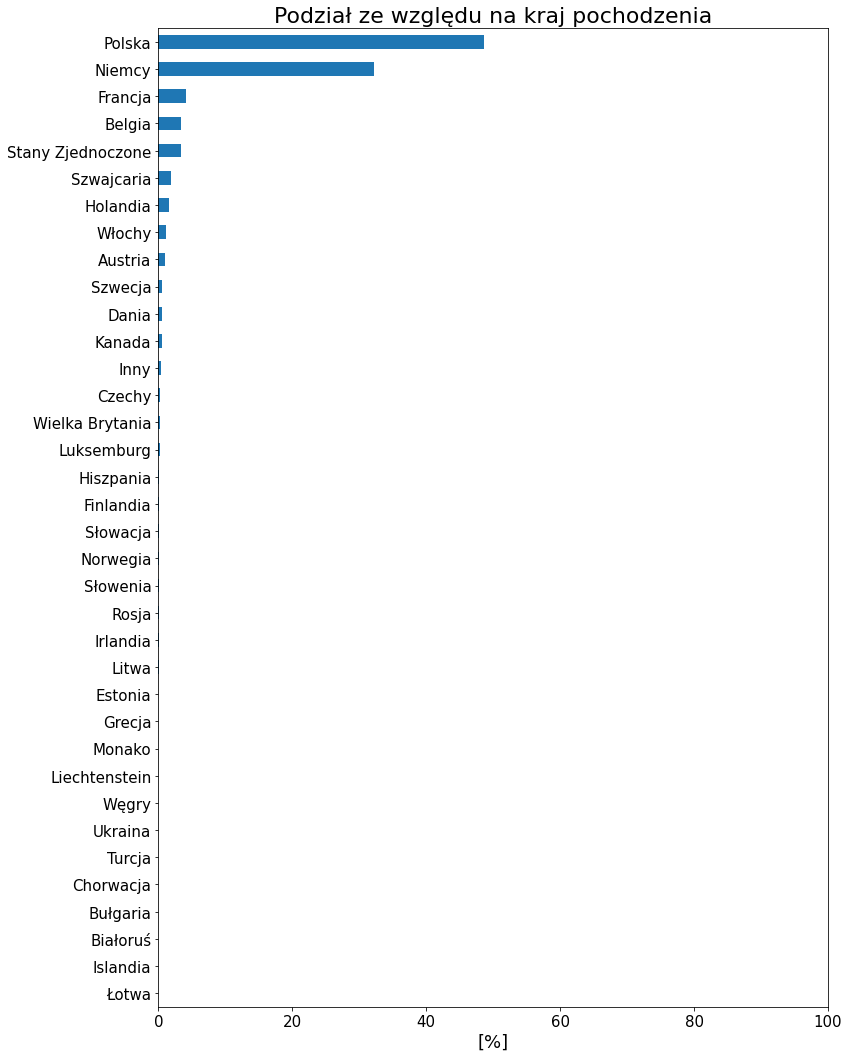

In [13]:
kraj = df["Kraj poch."].value_counts(normalize=True, ascending=True) * 100
plot_3 = kraj.plot(kind='barh', figsize=(12,18), fontsize=15, xticks=[0, 20, 40, 60, 80, 100] ,title='Podział ze względu na kraj pochodzenia')
plot_3.set_xlabel("[%]", fontsize=18)
plot_3.title.set_size(22)

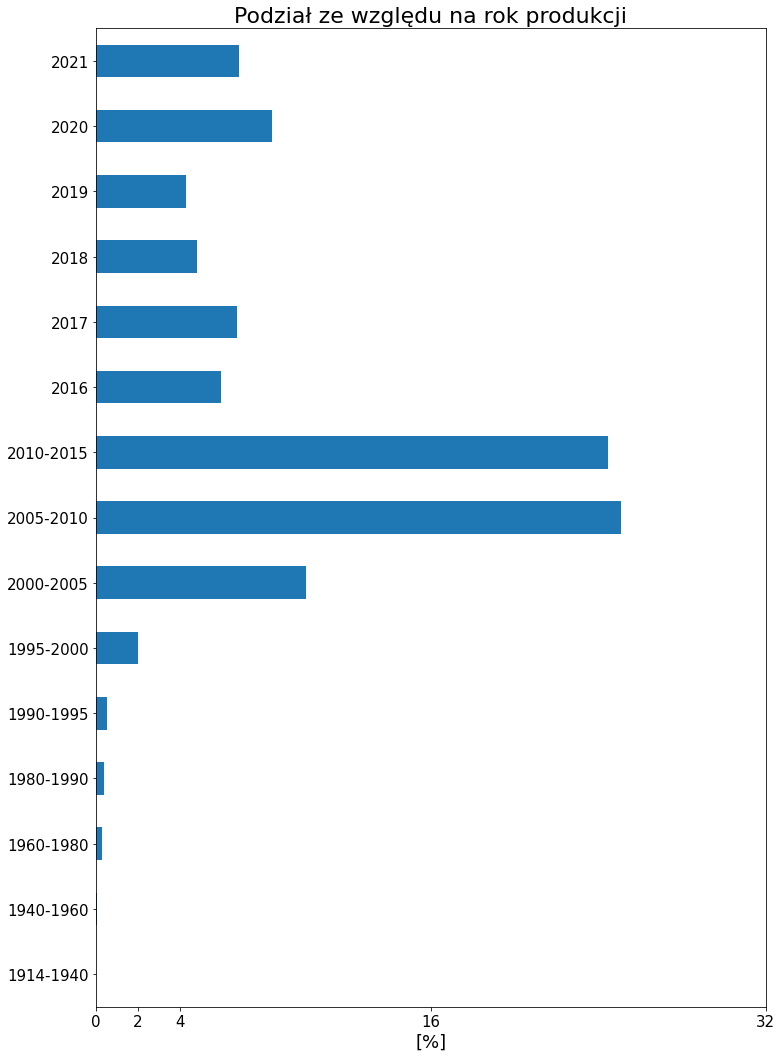

In [14]:
rok_p = pd.cut(df["Rok prod."], bins=[1914, 1940, 1960, 1980, 1990, 1995, 2000, 2005, 2010, 2015, 2016, 2017, 2018, 2019, 2020, 2021], labels=['1914-1940', '1940-1960', '1960-1980', '1980-1990', '1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015', '2016', '2017', '2018', '2019', '2020', '2021'], ordered=True).value_counts(normalize=True, sort=False) * 100
plot_4 = rok_p.plot(kind='barh', figsize=(12,18), fontsize=15, xticks=[0, 2, 4, 16, 32] ,title='Podział ze względu na rok produkcji')
plot_4.set_xlabel("[%]", fontsize=18)
plot_4.title.set_size(22)

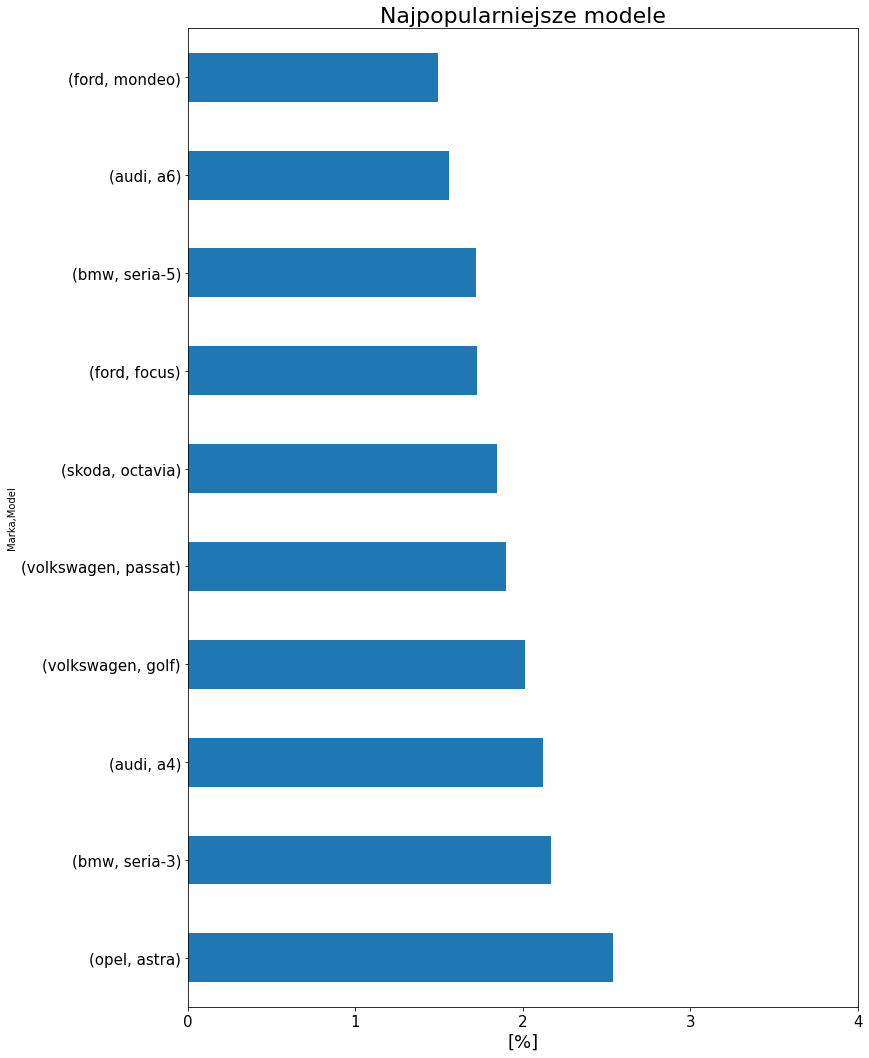

In [15]:
naj_modele = df[['Marka', 'Model']].value_counts(normalize=True, ascending=True).nlargest(10) * 100
plot_5 = naj_modele.plot(kind='barh', figsize=(12,18), fontsize=15, xticks=[0, 1, 2, 3, 4] ,title='Najpopularniejsze modele')
plot_5.set_xlabel("[%]", fontsize=18)
plot_5.title.set_size(22)

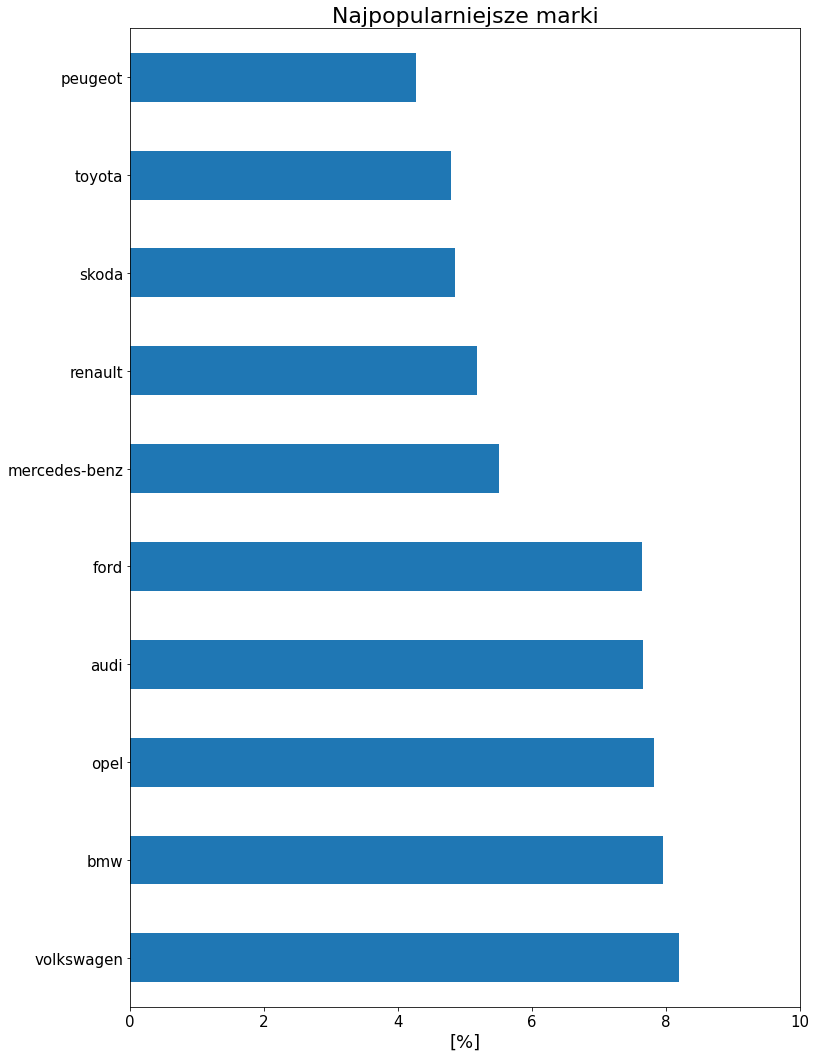

In [17]:
marka = df['Marka'].value_counts(normalize=True, ascending=True).nlargest(10) * 100
plot_8 = marka.plot(kind='barh', figsize=(12,18), fontsize=15, xticks=[0, 2, 4, 6, 8, 10] ,title='Najpopularniejsze marki')
plot_8.set_xlabel("[%]", fontsize=18)
plot_8.title.set_size(22)

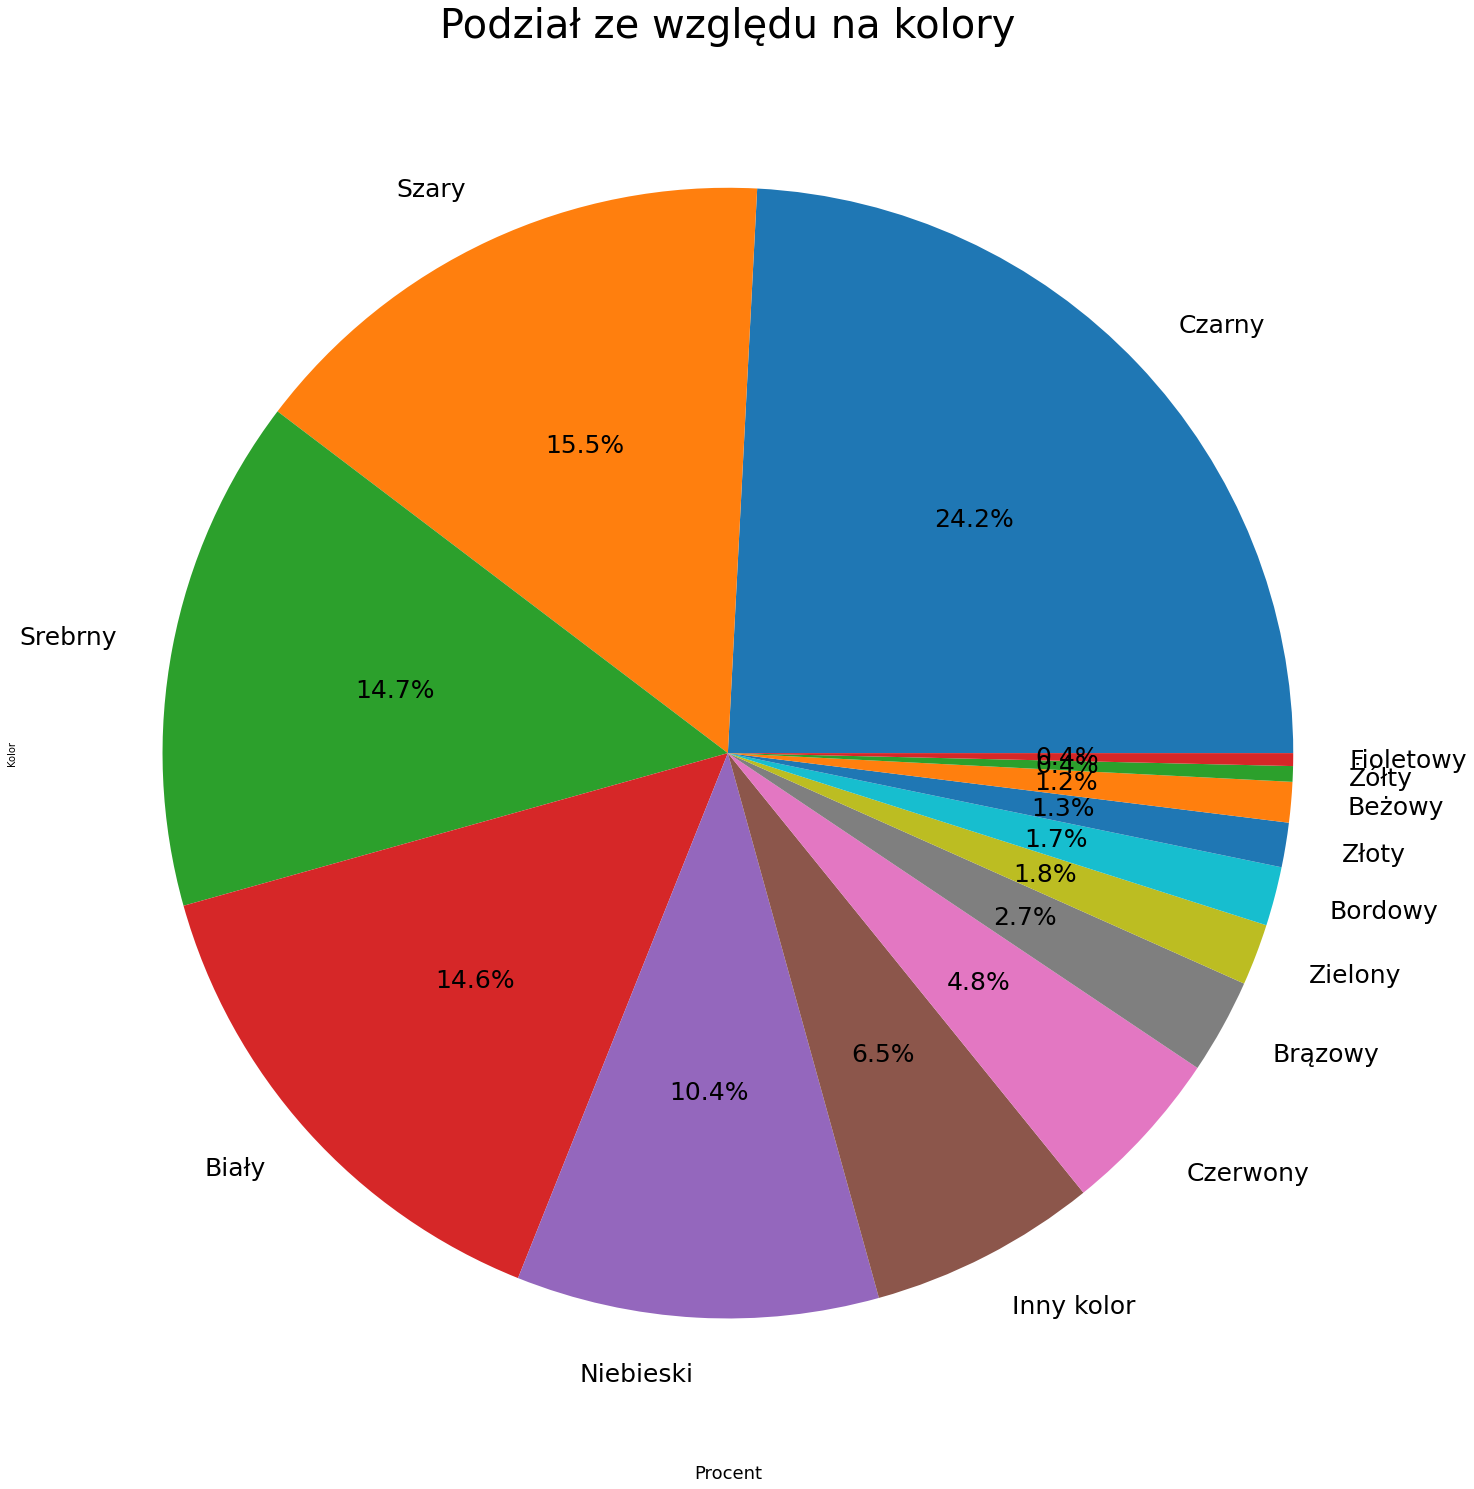

In [18]:
kolor = df["Kolor"].value_counts(normalize=True) * 100
plot_6 = kolor.plot(kind='pie', figsize=(26,26), autopct='%1.1f%%', fontsize=25, title='Podział ze względu na kolory')
plot_6.set_xlabel("Procent", fontsize=18)
plot_6.title.set_size(40)

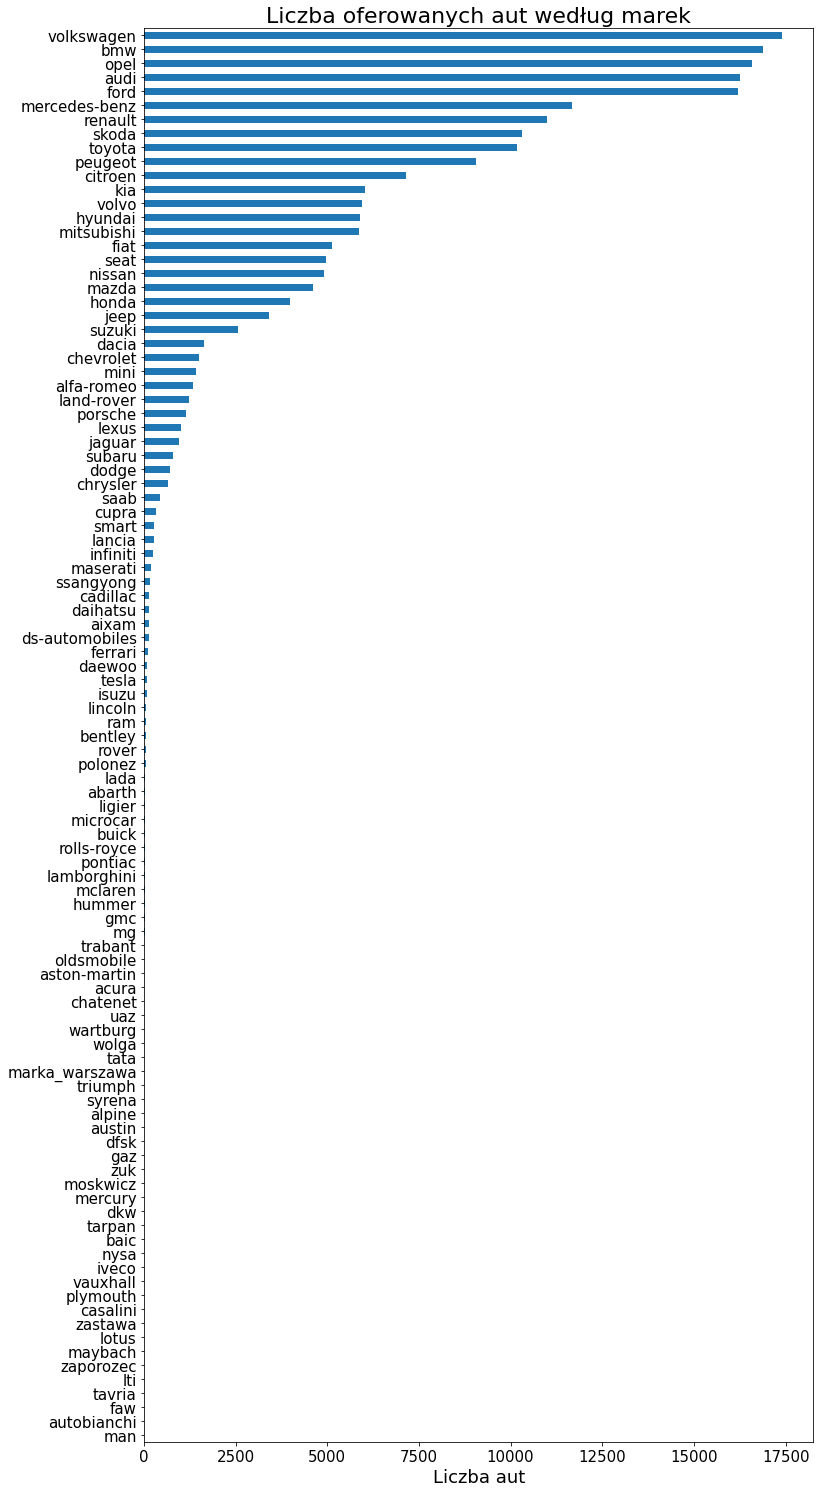

In [19]:
plot_7 = df['Marka'].value_counts(ascending=True).plot(kind='barh', figsize=(12,26), fontsize=15, title='Liczba oferowanych aut według marek')
plot_7.set_xlabel("Liczba aut", fontsize=18)
plot_7.title.set_size(22)

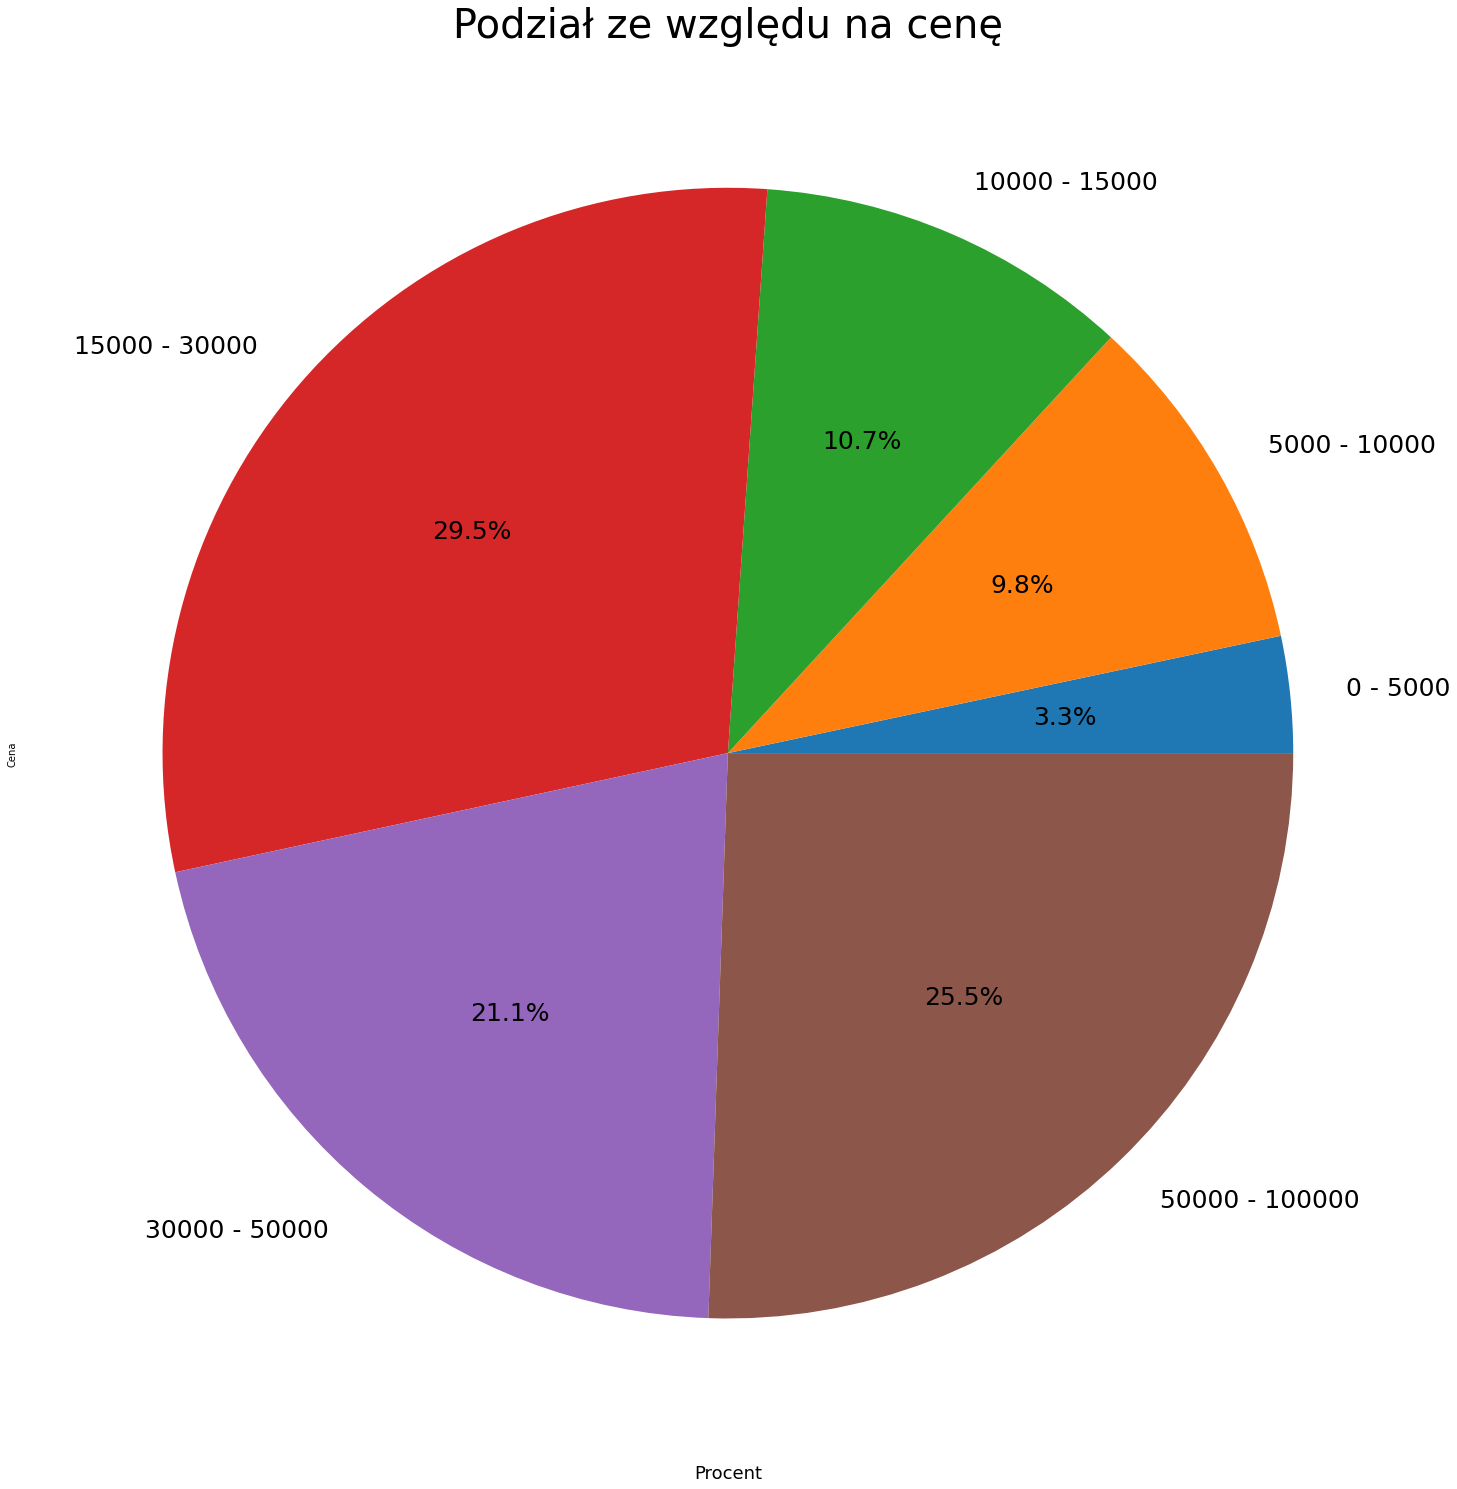

In [20]:
cena = pd.cut(df['Cena'], bins=[0, 5000, 10000, 15000, 30000, 50000, 100000], labels=['0 - 5000', '5000 - 10000', '10000 - 15000', '15000 - 30000', '30000 - 50000', '50000 - 100000'], ordered=True).value_counts(normalize=True, sort=False) * 100
plot_9 = cena.plot(kind='pie', figsize=(26,26), autopct='%1.1f%%', fontsize=25, title='Podział ze względu na cenę')
plot_9.set_xlabel("Procent", fontsize=18)
plot_9.title.set_size(40)

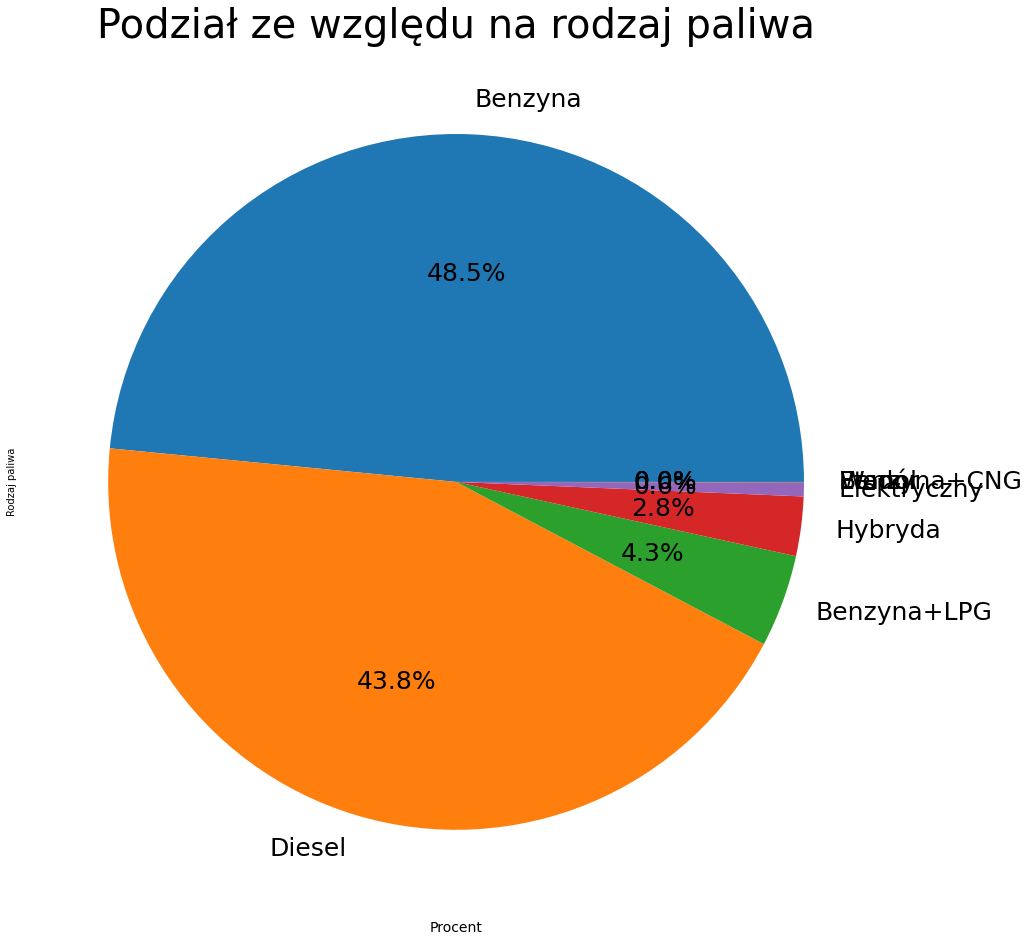

In [21]:
paliwo = df['Rodzaj paliwa'].value_counts(normalize=True) * 100
plot_10 = paliwo.plot(kind='pie', figsize=(16,16), autopct='%1.1f%%', fontsize=25, title='Podział ze względu na rodzaj paliwa')
plot_10.set_xlabel("Procent", fontsize=14)
plot_10.title.set_size(40)

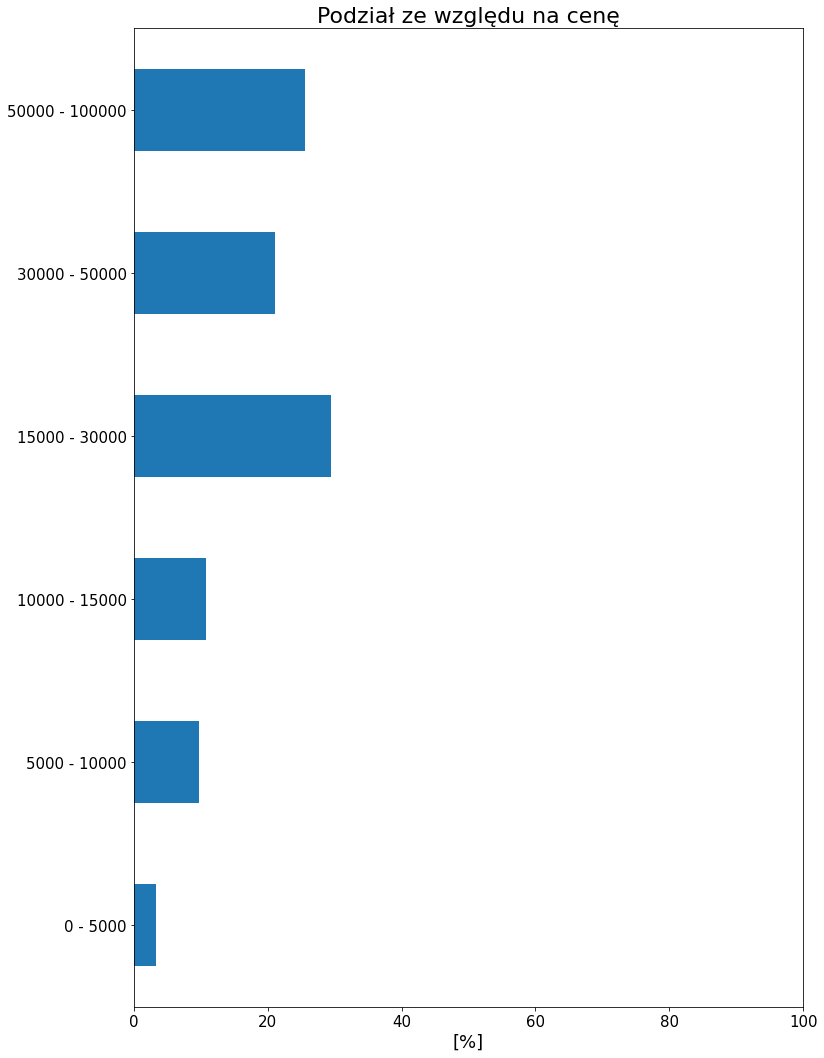

In [22]:
plot_11 = cena.plot(kind='barh', figsize=(12,18), fontsize=15, xticks=[0, 20, 40, 60, 80, 100] ,title='Podział ze względu na cenę')
plot_11.set_xlabel("[%]", fontsize=18)
plot_11.title.set_size(22)